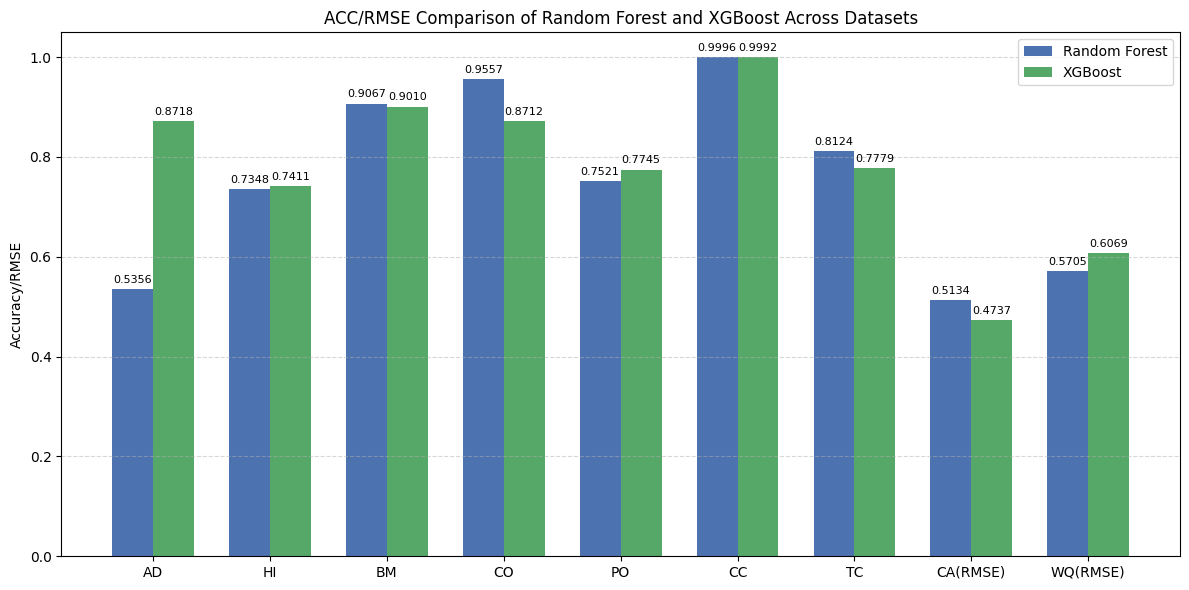

In [20]:
import matplotlib.pyplot as plt
import numpy as np

datasets = [
    "AD", "HI", "BM", "CO", "PO", "CC", "TC", "CA(RMSE)", "WQ(RMSE)"
]

rf_accuracy = [0.5356, 0.7348, 0.9067, 0.9557, 0.7521, 0.9996, 0.8124, 0.5134, 0.5705]
xgb_accuracy = [0.8718, 0.7411, 0.9010, 0.8712, 0.7745, 0.9992, 0.7779, 0.4737, 0.6069]

x = np.arange(len(datasets)) 
width = 0.35 


fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, rf_accuracy, width, label='Random Forest', color='#4C72B0')
bars2 = ax.bar(x + width/2, xgb_accuracy, width, label='XGBoost', color='#55A868')

ax.set_ylabel('Accuracy/RMSE')
ax.set_title('ACC/RMSE Comparison of Random Forest and XGBoost Across Datasets')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


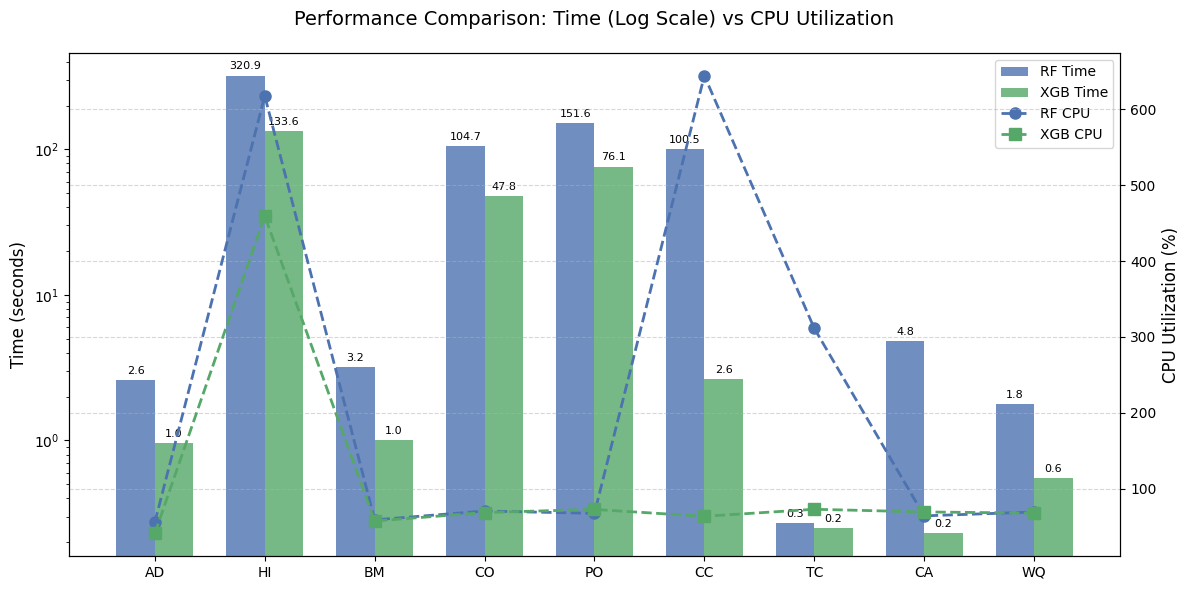

In [21]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ["AD", "HI", "BM", "CO", "PO", "CC", "TC", "CA", "WQ"]
rf_time = [2.59, 320.90, 3.21, 104.65, 151.55, 100.52, 0.27, 4.82, 1.78]
xgb_time = [0.96, 133.57, 1.00, 47.80, 76.08, 2.64, 0.25, 0.23, 0.55]
rf_cpu = [55.9, 617.9, 58.9, 70.6, 67.5, 644.5, 311.4, 64.2, 69.3]
xgb_cpu = [41.1, 459.6, 57.4, 68.6, 72.7, 63.6, 72.9, 69.4, 67.8]

# 创建画布和主坐标轴
fig, ax1 = plt.subplots(figsize=(12, 6))
x = np.arange(len(datasets))
width = 0.35

# 绘制时间柱状图（主坐标轴）
bars_rf_time = ax1.bar(x - width/2, rf_time, width, label='RF Time', color='#4C72B0', alpha=0.8)
bars_xgb_time = ax1.bar(x + width/2, xgb_time, width, label='XGB Time', color='#55A868', alpha=0.8)
ax1.set_ylabel('Time (seconds)', fontsize=12)
ax1.set_yscale('log')  # 对数刻度处理量级差异
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)

# 创建副坐标轴（CPU）
ax2 = ax1.twinx()
line_rf_cpu, = ax2.plot(x, rf_cpu, 'o--', color='#4C72B0', linewidth=2, markersize=8, label='RF CPU')
line_xgb_cpu, = ax2.plot(x, xgb_cpu, 's--', color='#55A868', linewidth=2, markersize=8, label='XGB CPU')
ax2.set_ylabel('CPU Utilization (%)', fontsize=12)

# 合并图例
lines = [bars_rf_time, bars_xgb_time, line_rf_cpu, line_xgb_cpu]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

# 添加数值标签
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

add_labels(bars_rf_time, ax1)
add_labels(bars_xgb_time, ax1)

plt.title('Performance Comparison: Time (Log Scale) vs CPU Utilization', pad=20, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\张凤智\AppData\Local\Temp\ipykernel_19904\3918818035.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0, 0, 0])  # Make room for legend


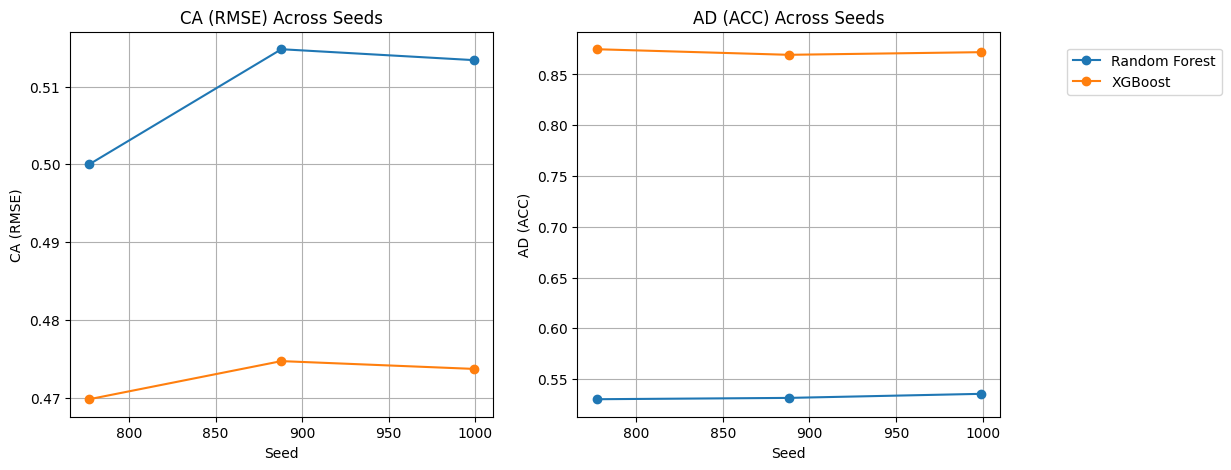

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Seeds used
seeds = [777, 888, 999]

# XGBoost results
xg_ca = [0.4698, 0.4747, 0.4737]
xg_ad = [0.8748, 0.8693, 0.8719]

# Random Forest results
rf_ca = [0.5000, 0.5148, 0.5134]
rf_ad = [0.5302, 0.5315, 0.5355]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# CA (RMSE) plot
axs[0].plot(seeds, rf_ca, marker='o', label='Random Forest')
axs[0].plot(seeds, xg_ca, marker='o', label='XGBoost')
axs[0].set_title('CA (RMSE) Across Seeds')
axs[0].set_xlabel('Seed')
axs[0].set_ylabel('CA (RMSE)')
axs[0].grid(True)

# AD (ACC) plot
axs[1].plot(seeds, rf_ad, marker='o')
axs[1].plot(seeds, xg_ad, marker='o')
axs[1].set_title('AD (ACC) Across Seeds')
axs[1].set_xlabel('Seed')
axs[1].set_ylabel('AD (ACC)')
axs[1].grid(True)

# Move legend outside
fig.legend(loc='center left', bbox_to_anchor=(0.95, 0.8))
plt.tight_layout(rect=[1, 0, 0, 0])  # Make room for legend

plt.show()
